In [1]:
#in [65]
# X.shape = (784, 100) # 100장 이미지
# Y.shape = (100, 10) # 100장 이미지, one hot encoding으로 10개 (0000100000 등)

In [199]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [200]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [201]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017F18A0D080>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017F1DF743C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000017F1DF746D8>)

In [202]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
b1 = tf.Variable(tf.random_normal([256], stddev=0.01))  # 1차원 행렬!
print(W1.shape, b1.shape)

(784, 256) (256,)


In [203]:
W2 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
b2 = tf.Variable(tf.random_normal([10], stddev=0.01))

In [204]:
optimizer = tf.train.AdamOptimizer(0.001)

In [205]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)
print('total_batch=', total_batch)

total_batch= 550


In [206]:
global_step = tf.train.create_global_step()
# 이미지 100개(batch size)씩 반복 학습 중에 조정되는 Gradient Descent 알고리즘 W, b 값 유지 (기억)

ValueError: "global_step" already exists.

In [264]:
for step in range(10):
    total_cost = 0
    total_accuracy = 0
    
    for i in range(total_batch):                        # 550번 반복
        X, Y = mnist.train.next_batch(batch_size)
        
        with tf.GradientTape() as tape:
            layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
            
            layer1 = tf.nn.dropout(layer1, keep_prob=0.8)   # hidden layer의 80%만 랜덤으로 사용해 진행
            
            hypothesis = tf.nn.softmax(tf.matmul(layer1, W2) + b2)
            
            cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
            grads = tape.gradient(cost, [W1, W2, b1, b2])
            total_cost += cost
            
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W1, W2, b1, b2]), global_step=global_step)
        
        is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
        total_accuracy += accuracy
        
    print('step: {} Loss: {:.4f} accuracy: {:.4f}'.format(step, total_cost/total_batch,
                                                          total_accuracy/total_batch))

step: 0 Loss: 1.4651 accuracy: 0.9963
step: 1 Loss: 1.4651 accuracy: 0.9963
step: 2 Loss: 1.4650 accuracy: 0.9964
step: 3 Loss: 1.4654 accuracy: 0.9959
step: 4 Loss: 1.4650 accuracy: 0.9963
step: 5 Loss: 1.4653 accuracy: 0.9961
step: 6 Loss: 1.4652 accuracy: 0.9961
step: 7 Loss: 1.4651 accuracy: 0.9963
step: 8 Loss: 1.4655 accuracy: 0.9958
step: 9 Loss: 1.4653 accuracy: 0.9959


In [265]:
test_images = mnist.test.images
test_labels = mnist.test.labels

In [271]:
layer1 = tf.nn.relu(tf.matmul(test_images, W1) + b1)

layer1 = tf.nn.dropout(layer1, 1.0)  # 전체 레이어 100% 사용해서 테스트 진행하도록 설정

predict = tf.nn.softmax(tf.matmul(layer1, W2) + b2)

predict

<tf.Tensor: id=12116345, shape=(10000, 10), dtype=float32, numpy=
array([[1.41192550e-32, 0.00000000e+00, 7.35759501e-34, ...,
        1.00000000e+00, 5.57484779e-31, 1.80406847e-33],
       [0.00000000e+00, 2.07287067e-24, 1.00000000e+00, ...,
        0.00000000e+00, 9.22068936e-32, 0.00000000e+00],
       [2.22643826e-31, 1.00000000e+00, 1.52658715e-15, ...,
        1.57937384e-13, 5.47097971e-14, 5.30712954e-32],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.62661129e-19, 4.78553469e-22, 1.31119229e-19],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.03476286e-22, 0.00000000e+00],
       [4.85662195e-34, 0.00000000e+00, 4.02349485e-30, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)>

In [277]:
predict = tf.argmax(predict, 1)
predict

<tf.Tensor: id=12116368, shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6], dtype=int64)>

In [268]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [269]:
test_labels = tf.argmax(test_labels, 1)
test_labels

<tf.Tensor: id=12116328, shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6], dtype=int64)>

In [270]:
is_correct = tf.equal(predict, test_labels)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy

<tf.Tensor: id=12116333, shape=(), dtype=float32, numpy=0.9812>

- 97.84
- 97.98
- 98.10
- 98.06
- 98.27
- 98.25
- 98.24
- 98.33
- 98.12

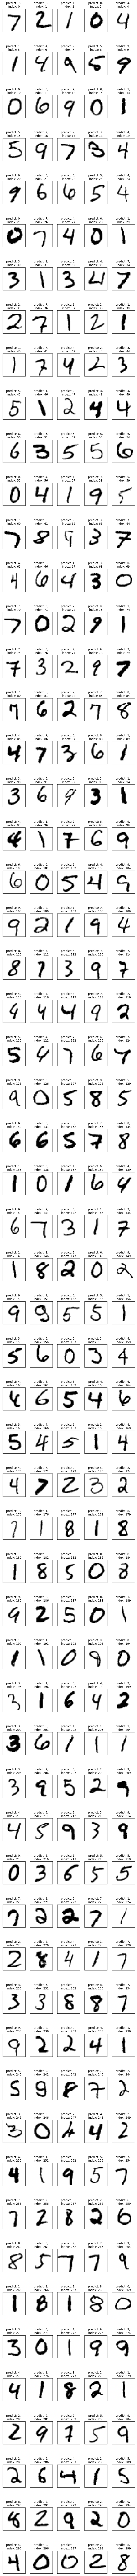

In [286]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 200))
for i in range(300):
    subplot = fig.add_subplot(60, 5, i + 1)  # row=60, col=5으로 나누고 i+1번째 이미지 출력
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('predict: %d, \nindex: %d' %(predict[i],i))
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

In [287]:
test_labels[124]

<tf.Tensor: id=12125378, shape=(), dtype=int64, numpy=7>

- 학습을 몇 번 더 반복시켜 accuracy를 99.50까지 만들고 다시 돌렸더니, 2행 4열의 5가 predict:6 -> 5로 수정됨을 볼 수 있었다. (아래 이미지는 1번 학습한 상태의 결과물)
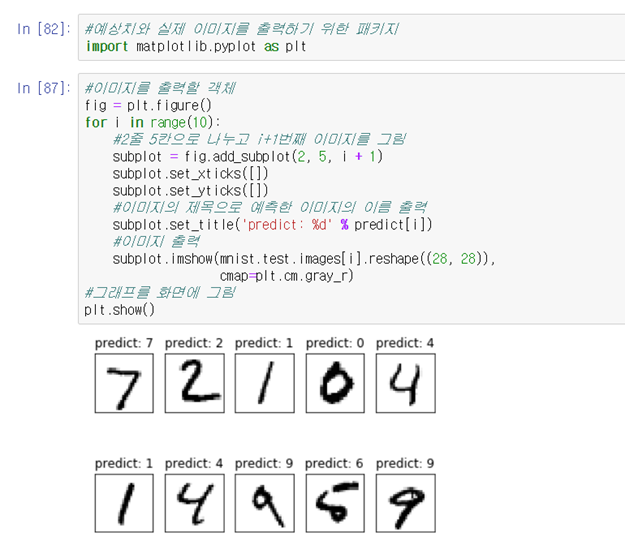

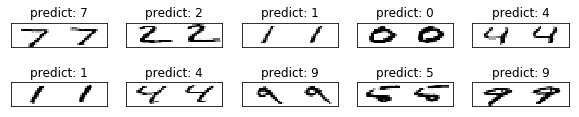

In [188]:
fig = plt.figure(figsize=(10, 2))
for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)  # row=60, col=5으로 나누고 i+1번째 이미지 출력
    subplot.set_xticks([])
    subplot.set_yticks([])
    
    subplot.set_title('predict: %d' %predict[i])
    subplot.imshow(mnist.test.images[i].reshape((14, 56)), cmap=plt.cm.gray_r)
    
plt.show()  # 짝수행, 홀수행 출력 나눠서

In [192]:
is_correct = tf.equal(predict, test_labels)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
accuracy

<tf.Tensor: id=3975157, shape=(), dtype=float32, numpy=0.9786>

In [290]:
# matrix

X = np.array([
    [1,1],
    [2,2],
    [3,3]
])

W = np.array([
    [10, 30, 50],
    [20, 40, 60]
])

b = np.array([
    [100],
    [200],
    [300]
])

In [291]:
tf.matmul(X, W)

<tf.Tensor: id=12125384, shape=(3, 3), dtype=int32, numpy=
array([[ 30,  70, 110],
       [ 60, 140, 220],
       [ 90, 210, 330]])>

In [292]:
tf.matmul(X, W) + b

<tf.Tensor: id=12125390, shape=(3, 3), dtype=int32, numpy=
array([[130, 170, 210],
       [260, 340, 420],
       [390, 510, 630]])>

In [293]:
b2 = np.array([[100, 200, 300]])
b2

array([[100, 200, 300]])

In [294]:
tf.matmul(X, W) + b2

<tf.Tensor: id=12125396, shape=(3, 3), dtype=int32, numpy=
array([[130, 270, 410],
       [160, 340, 520],
       [190, 410, 630]])>

In [295]:
b.shape, b2.shape

((3, 1), (1, 3))

In [296]:
b3 = np.array([1, 2, 3])

In [297]:
b3

array([1, 2, 3])

In [298]:
b3.shape # -> 3열로 취급해서 브로드캐스팅 됨.

(3,)

In [299]:
tf.matmul(X, W) + b3

<tf.Tensor: id=12125402, shape=(3, 3), dtype=int32, numpy=
array([[ 31,  72, 113],
       [ 61, 142, 223],
       [ 91, 212, 333]])>